## Autoregressive Model

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)

### Simulate AR(2) Process

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [6]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [8]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

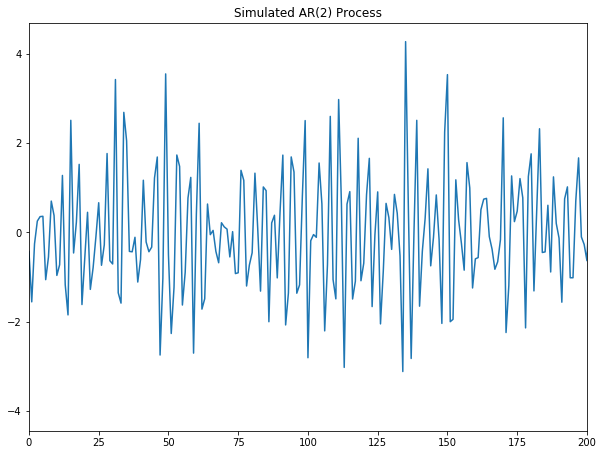

In [9]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

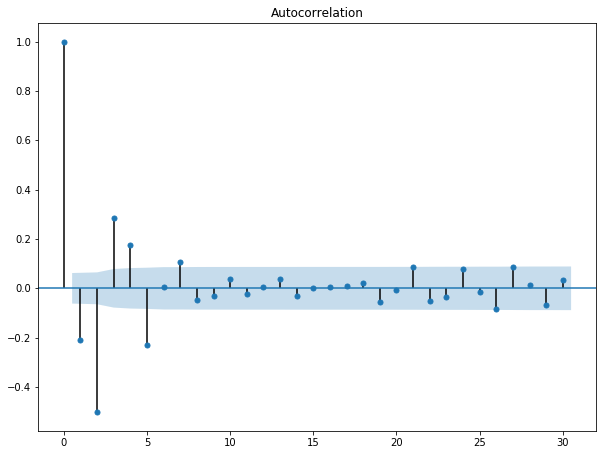

In [11]:
#####   looking at the ACF for an Autoregressive process should not give us any relevant information. 

plot_acf(AR2_process);

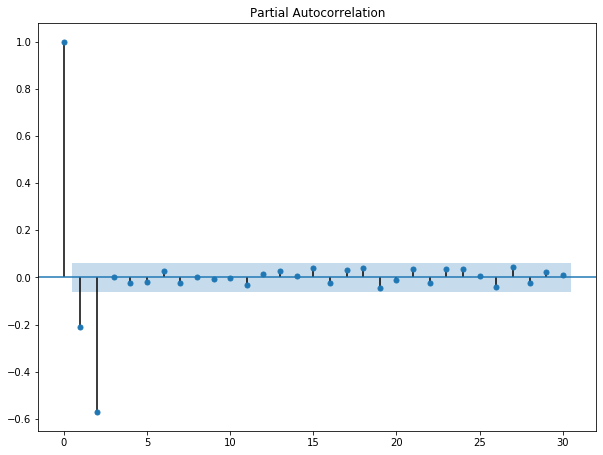

In [13]:
#####   only a significant peak up until lag number two and the rest is not significant. 
#####   So, you can get the order (2) of an AR process from the Pacf.


plot_pacf(AR2_process);

In [15]:
#####   we will use the Yule Walker equation to model back our simulation to see if we can get the coefficients that we set up.


rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

#####   we got 0.32727813  and 0.57072893 and sigma is close to 1.   #####

rho: [0.32727813 0.57072893]
sigma: 1.01560402456274


### Simulate AR(3) Process

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3} $

In [16]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [22]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

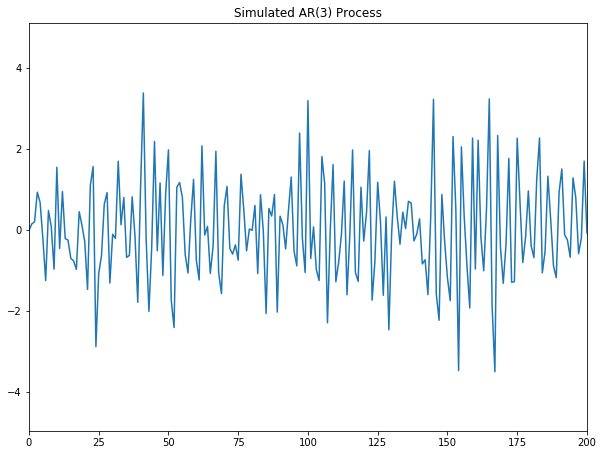

In [23]:
plt.plot(AR3_process)
plt.title('Simulated AR(3) Process')
plt.xlim(0, 200)
plt.show()

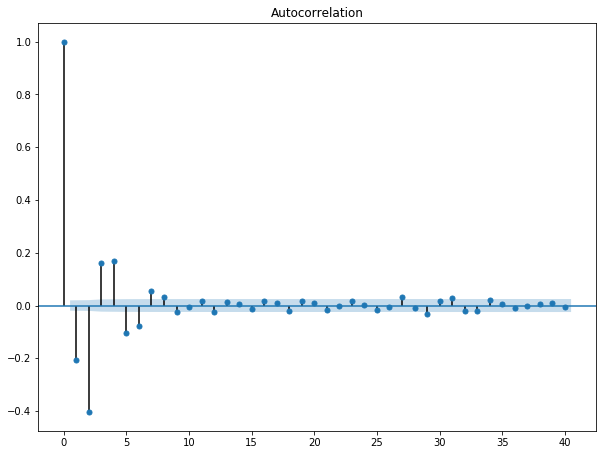

In [24]:
plot_acf(AR3_process);

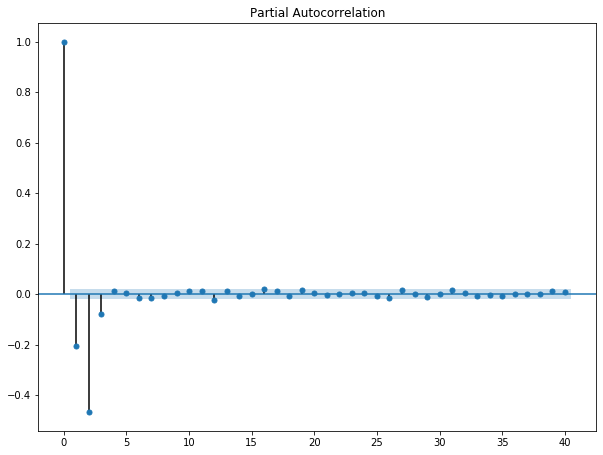

In [25]:
plot_pacf(AR3_process);

In [26]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.34003815 0.49114045 0.07962019]
sigma: 1.006982191736286
